In [4]:
import subprocess
from threading import Thread
import fitz
import glob
from PIL import Image, ImageDraw

In [5]:
## get marp commands
script_path = "./utils/marp_pdf.sh"
rc = subprocess.call(script_path)
print("Marp commands created")

def run_script(python_script):
    print(python_script)
    rc = subprocess.call(python_script, shell=True)
    return

def run_bash(bash_script):
    rc = subprocess.call(bash_script)
    return

rc = subprocess.run("pkill -f distributed_computing", shell=True)
a = Thread(target=run_script, args=["python /home/tseng/projects/utils/distributed_computing/start_computing_server.py -t ./commands_marp_auto.txt -p 2050"])
# subprocess.Popen("python /home/tseng/projects/utils/distributed_computing/start_computing_server.py -t ./commands_marp_auto.txt -p 2050", shell=True)
b = Thread(target=run_bash, args=["./utils/distributed_computing.sh"])

a.start()
b.start()
a.join()
b.join()
print("Finish generated marp pdf")

Marp commands created
python /home/tseng/projects/utils/distributed_computing/start_computing_server.py -t ./commands_marp_auto.txt -p 2050


[|              ]   0.00 %

[|||||||||||||||]  99.95 %


Closing server
Server closed
Finish generated marp pdf


[|||||||||||||||] 100.00 %

In [6]:
## parse pdf
import tqdm
import os
pdf_files = sorted(glob.glob("output/*/*.pdf"))
for pdf_file in tqdm.tqdm(pdf_files):
    pdf_nb = pdf_file.split("/")[-2]
    os.makedirs("output/%s/images/" % (pdf_nb), exist_ok=True)
    pdf = fitz.open(pdf_file)
    for page in pdf:
        ## save img
        pix = page.get_pixmap()
        img_path = "output/%s/images/%s.%03d.jpg" % (pdf_nb, pdf_nb, page.number)
        # print(img_path)
        # pix.save(img_path)

        ## get words
        # words = page.get_text("words")
        ## get images
        # img_list = page.get_images(full=True)
        # get drawings 
        # drawings = page.get_drawings()
        with Image.frombytes("RGB", [pix.width, pix.height], pix.samples) as im:
            # draw = ImageDraw.Draw(im)
            # for word in words:
            #     draw.rectangle((word[0], word[1], word[2], word[3]), outline=(255,0,0), width=1)
            # for img_el in img_list:
            #     rect = page.get_image_bbox(img_el)
            #     draw.rectangle((rect[0],rect[1], rect[2], rect[3]), outline=(0,0,255), width=1)
            # for item in drawings:
            #     rect = item["rect"]
            #     area = (rect[2]-rect[0])*(rect[3]-rect[1])
            #     # print(area)
            #     if area < 518400*0.9:
            #         draw.rectangle((rect[0],rect[1], rect[2], rect[3]), outline=(0,255,0), width=1)
            im.save(img_path, quality=90)
        

  1%|          | 8/953 [00:00<00:39, 23.66it/s]

100%|██████████| 953/953 [01:07<00:00, 14.09it/s]


100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


output/35 mm equivalent focal length/images/35 mm equivalent focal length.000.jpg
output/35 mm equivalent focal length/images/35 mm equivalent focal length.001.jpg
output/35 mm equivalent focal length/images/35 mm equivalent focal length.002.jpg
output/35 mm equivalent focal length/images/35 mm equivalent focal length.003.jpg
output/35 mm equivalent focal length/images/35 mm equivalent focal length.004.jpg
output/35 mm equivalent focal length/images/35 mm equivalent focal length.005.jpg
output/35 mm equivalent focal length/images/35 mm equivalent focal length.006.jpg


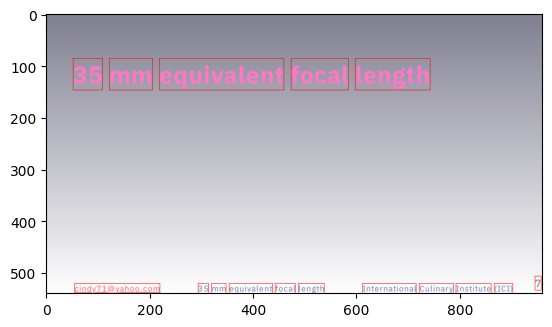

In [11]:
## parse pdf
import tqdm
import glob
import fitz
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline
pdf_files = sorted(glob.glob("output/*/*.pdf"))
for pdf_file in tqdm.tqdm(pdf_files[:1]):
    pdf_nb = pdf_file.split("/")[-2]
    pdf = fitz.open(pdf_file)
    for page in pdf:
        ## save img
        pix = page.get_pixmap()
        img_path = "output/%s/images/%s.%03d.jpg" % (pdf_nb, pdf_nb, page.number)
        print(img_path)
        # print(img_path)
        # pix.save(img_path)

        ## get words
        words = page.get_text("words")
        ## get images
        img_list = page.get_images(full=True)
        ## get drawings 
        drawings = page.get_drawings()
        with Image.frombytes("RGB", [pix.width, pix.height], pix.samples) as im:
            draw = ImageDraw.Draw(im)
            for word in words:
                draw.rectangle((word[0], word[1], word[2], word[3]), outline=(255,0,0), width=1)
            for img_el in img_list:
                rect = page.get_image_bbox(img_el)
                draw.rectangle((rect[0],rect[1], rect[2], rect[3]), outline=(0,0,255), width=1)
            # for item in drawings:
            #     rect = item["rect"]
            #     area = (rect[2]-rect[0])*(rect[3]-rect[1])
            #     # print(area)
            #     if area < 518400*0.9:
            #         draw.rectangle((rect[0],rect[1], rect[2], rect[3]), outline=(0,255,0), width=1)
            plt.imshow(im)
            # im.save(img_path, quality=90)
        